In [1]:
# KNN Classification
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
filename = 'https://raw.githubusercontent.com/slmsshk/pima-indians-diabetes.data.csv/main/pima-indians-diabetes.csv'
names = [
    'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'
]
df= read_csv(filename, names=names)
#array = dataframe.values
X = df.iloc[:, 0:8]
Y = df.iloc[:, 8]

In [3]:
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#num_folds = 10
kfold = KFold(n_splits=10)

In [4]:
model = KNeighborsClassifier(n_neighbors=12)
results = cross_val_score(model, X, Y, cv=kfold)

In [6]:
results

array([0.71428571, 0.84415584, 0.68831169, 0.66233766, 0.76623377,
       0.80519481, 0.77922078, 0.83116883, 0.71052632, 0.72368421])

In [5]:
print(results.mean())

0.7525119617224881


### Grid Search for Algorithm Tuning

In [6]:
# Grid Search for Algorithm Tuning
from sklearn.model_selection import GridSearchCV

In [7]:
n_neighbors= np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [8]:
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [9]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [10]:
print(grid.best_score_)
print(grid.best_params_)

0.7578558696205755
{'n_neighbors': 14}


### Visualizing the CV results

In [13]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 40)
# empty list to store scores
k_scores = []

#we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


# k_scores=grid.best_score_
pd.Series(k_scores).sort_values(ascending=False)

16    0.755297
17    0.755280
13    0.753913
15    0.752614
21    0.750120
20    0.750068
22    0.747522
18    0.747471
11    0.747368
24    0.746206
19    0.746189
14    0.744805
23    0.743592
9     0.743472
37    0.742259
34    0.742242
12    0.742208
6     0.739627
38    0.738380
8     0.738346
7     0.738312
26    0.737081
32    0.737064
35    0.737030
10    0.736945
33    0.735748
36    0.735731
5     0.735714
30    0.734450
25    0.733168
28    0.731852
31    0.731852
27    0.730537
29    0.725359
4     0.721377
3     0.718712
1     0.712235
2     0.703059
0     0.679665
dtype: float64

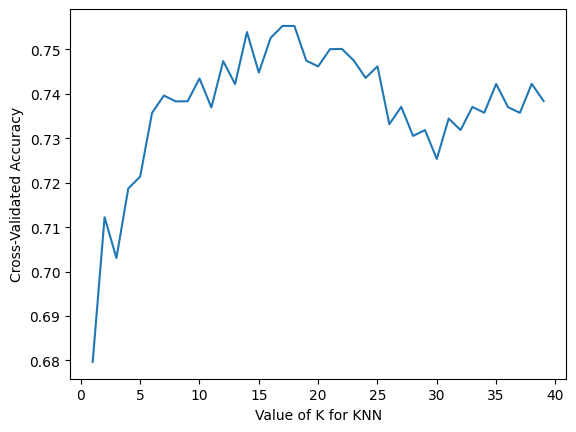

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# choose k between 1 to 40
k_range = range(1, 40)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())

# plot to see clearly
plt.plot(k_range, k_scores)


plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()